### Task 2:

In [1]:
### Unzip the files.

from zipfile import ZipFile

with ZipFile("original_data/original_data.zip","r") as zip_ref:
    zip_ref.extractall("bld")

### Task 3:
Question 1: 

A function should specify which kinds of input it takes, and which kind of output it generates. Meanwhile, it is better to only take and return specific types of object. The arguement should be simple and readable. 

In [2]:
def variable_function(observations:list) -> str:
    print('variable = ', observations)
    
variable_function([1,2,3,4,5,6,7])

variable =  [1, 2, 3, 4, 5, 6, 7]


Question 2：  


The first solution is to run cells in order, and never rerun a cell which has been runned before. The second solution is to solve one task in one cell, put all code for a task together. The third solution is to create a new variable each time you want to modify an object, never let "inplace = True". All these solutions could make each cell only return a certain and unique output.


## Task 4:

In [3]:
### Transfer and clean the "chs_data.dta" to DataFrame.

import pandas as pd

# load the "chs_data"
chs = pd.read_stata('bld/chs_data.dta')

# transfer the column "momid"
chs['mom_id'] = chs['momid'].astype(int)
chs = chs.drop(columns = 'momid')

C:\Users\gewei\AppData\Local\Temp\ipykernel_3592\3893033235.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  chs['mom_id'] = chs['momid'].astype(int)


In [4]:

# clean observations on the "year" condition
chs = chs.drop(chs[
    (chs['year'] < 1986) |
    (chs['year'] > 2010) |
    (chs['year'] % 2 != 0)
    ].index)


In [5]:

# set the indexs
chs['child_id'] = chs['childid'].astype(int)
chs = chs.drop(columns = 'childid')
chs = chs.set_index(['child_id', 'year'])

chs

age  birthorder  race  sex     yob  nchildren  momage  dpar  \
child_id year                                                                
201      1994    1           1   3.0  1.0  1993.0        2.0    34.0   0.0   
         1996    3           1   3.0  1.0  1993.0        2.0    34.0   0.0   
         1998    5           1   3.0  1.0  1993.0        2.0    34.0   0.0   
         2000    7           1   3.0  1.0  1993.0        2.0    34.0   0.0   
         2002    9           1   3.0  1.0  1993.0        2.0    34.0   0.0   
...            ...         ...   ...  ...     ...        ...     ...   ...   
1255501  1992    5           1   3.0  1.0  1987.0        1.0    24.0   0.0   
         1994    7           1   3.0  1.0  1987.0        1.0    24.0   0.0   
         1996    9           1   3.0  1.0  1987.0        1.0    24.0   0.0   
         1998   11           1   3.0  1.0  1987.0        1.0    24.0   0.0   
         2000   13           1   3.0  1.0  1987.0        1.0    24.0   0.0   

               d19872001  teenmom  ...  dmomhgc  dlogsal30  dconvict  dprobat  \
child_id year                      ...                                          
201      1994        1.0      0.0  ...      1.0        1.0       0.0      0.0   
         1996        1.0      0.0  ...      1.0        1.0       0.0      0.0   
         1998        1.0      0.0  ...      1.0        1.0       0.0      0.0   
         2000        1.0      0.0  ...      1.0        1.0       0.0      0.0   
         2002        1.0      0.0  ...      1.0        1.0       0.0      0.0   
...                  ...      ...  ...      ...        ...       ...      ...   
1255501  1992        1.0      0.0  ...      1.0        0.0       0.0      0.0   
         1994        1.0      0.0  ...      1.0        0.0       0.0      0.0   
         1996        1.0      0.0  ...      1.0        0.0       0.0      0.0   
         1998        1.0      0.0  ...      1.0        0.0       0.0      0.0   
         2000        1.0      0.0  ...      1.0        0.0       0.0      0.0   

               ddrug1  ddrug2  drepeat  dspecial  dteenpreg  mom_id  
child_id year                                                        
201      1994     0.0     0.0      0.0       1.0        0.0       2  
         1996     0.0     0.0      0.0       1.0        0.0       2  
         1998     0.0     0.0      0.0       1.0        0.0       2  
         2000     0.0     0.0      0.0       1.0        0.0       2  
         2002     0.0     0.0      0.0       1.0        0.0       2  
...               ...     ...      ...       ...        ...     ...  
1255501  1992     0.0     0.0      0.0       0.0        0.0   12555  
         1994     0.0     0.0      0.0       0.0        0.0   12555  
         1996     0.0     0.0      0.0       0.0        0.0   12555  
         1998     0.0     0.0      0.0       0.0        0.0   12555  
         2000     0.0     0.0      0.0       0.0        0.0   12555  

[6785 rows x 172 columns]

### Task 5:

In [6]:
### Transfer and clean the "BEHAVIOR_PROBLEMS_INDEX.dta" to DataFrame.

# load the "BEHAVIOR_PROBLEMS_INDEX"
bpi = pd.read_stata('bld/BEHAVIOR_PROBLEMS_INDEX.dta', convert_categoricals = False)

# code the missing values
import numpy as np
bpi[bpi < 0] = np.nan


In [7]:

# match the columns with variables in "bpi_variable_info.csv"
info = pd.read_csv('bld/bpi_variable_info.csv')
bpi = bpi.drop(columns = bpi.columns.difference(info['nlsy_name']))


In [8]:

# rename the columns corresponding to "bpi_variable_info.csv"
nlsy_name = info['nlsy_name']
readable_name = info['readable_name']
survey_year = "-" + info['survey_year'] 
for i in range(0, len(nlsy_name)):
    bpi = bpi.rename(columns = {nlsy_name[i] : (readable_name[i] + survey_year[i])})
# name new bpi with survey year, in oder to transform it into long type
bpi

childid-invariant  momid-invariant  birth_order-invariant  \
0                  201.0              2.0                    1.0   
1                  202.0              2.0                    2.0   
2                  301.0              3.0                    1.0   
3                  302.0              3.0                    2.0   
4                  303.0              3.0                    3.0   
...                  ...              ...                    ...   
11516          1267201.0          12672.0                    1.0   
11517          1267202.0          12672.0                    2.0   
11518          1267301.0          12673.0                    1.0   
11519          1267302.0          12673.0                    2.0   
11520          1267501.0          12675.0                    1.0   

       anxiety_mood-1986  anxiety_complain-1986  headstrong_tense-1986  \
0                    NaN                    NaN                    NaN   
1                    NaN                    NaN                    NaN   
2                    3.0                    3.0                    3.0   
3                    NaN                    NaN                    NaN   
4                    NaN                    NaN                    NaN   
...                  ...                    ...                    ...   
11516                NaN                    NaN                    NaN   
11517                NaN                    NaN                    NaN   
11518                NaN                    NaN                    NaN   
11519                NaN                    NaN                    NaN   
11520                NaN                    NaN                    NaN   

       antisocial_cheat-1986  anxiety_fearful-1986  headstrong_argues-1986  \
0                        NaN                   NaN                     NaN   
1                        NaN                   NaN                     NaN   
2                        3.0                   2.0                     3.0   
3                        NaN                   NaN                     NaN   
4                        NaN                   NaN                     NaN   
...                      ...                   ...                     ...   
11516                    NaN                   NaN                     NaN   
11517                    NaN                   NaN                     NaN   
11518                    NaN                   NaN                     NaN   
11519                    NaN                   NaN                     NaN   
11520                    NaN                   NaN                     NaN   

       hyperactive_concentration-1986  ...  dependent_clings-2010  \
0                                 NaN  ...                    NaN   
1                                 NaN  ...                    NaN   
2                                 3.0  ...                    NaN   
3                                 NaN  ...                    NaN   
4                                 NaN  ...                    NaN   
...                               ...  ...                    ...   
11516                             NaN  ...                    NaN   
11517                             NaN  ...                    NaN   
11518                             NaN  ...                    NaN   
11519                             NaN  ...                    NaN   
11520                             NaN  ...                    NaN   

       dependent_cries-2010  dependent_attention-2010  \
0                       NaN                       NaN   
1                       NaN                       NaN   
2                       NaN                       NaN   
3                       NaN                       NaN   
4                       NaN                       NaN   
...                     ...                       ...   
11516                   NaN                       NaN   
11517                   NaN                       NaN   
11518                 

In [9]:

# adjust the bpi to long dataframe
readname = readable_name.drop_duplicates()
bpi = pd.wide_to_long(bpi, stubnames=readname, i = 'childid-invariant', j = 'year', sep ='-')
bpi

momid-invariant  birth_order-invariant  childid  \
childid-invariant year                                                    
201.0             1986              2.0                    1.0      NaN   
202.0             1986              2.0                    2.0      NaN   
301.0             1986              3.0                    1.0      NaN   
302.0             1986              3.0                    2.0      NaN   
303.0             1986              3.0                    3.0      NaN   
...                                 ...                    ...      ...   
1267201.0         2010          12672.0                    1.0      NaN   
1267202.0         2010          12672.0                    2.0      NaN   
1267301.0         2010          12673.0                    1.0      NaN   
1267302.0         2010          12673.0                    2.0      NaN   
1267501.0         2010          12675.0                    1.0      NaN   

                        momid  birth_order  anxiety_mood  anxiety_complain  \
childid-invariant year                                                       
201.0             1986    NaN          NaN           NaN               NaN   
202.0             1986    NaN          NaN           NaN               NaN   
301.0             1986    NaN          NaN           3.0               3.0   
302.0             1986    NaN          NaN           NaN               NaN   
303.0             1986    NaN          NaN           NaN               NaN   
...                       ...          ...           ...               ...   
1267201.0         2010    NaN          NaN           NaN               NaN   
1267202.0         2010    NaN          NaN           NaN               NaN   
1267301.0         2010    NaN          NaN           NaN               NaN   
1267302.0         2010    NaN          NaN           NaN               NaN   
1267501.0         2010    NaN          NaN           NaN               NaN   

                        headstrong_tense  antisocial_cheat  anxiety_fearful  \
childid-invariant year                                                        
201.0             1986               NaN               NaN              NaN   
202.0             1986               NaN               NaN              NaN   
301.0             1986               3.0               3.0              2.0   
302.0             1986               NaN               NaN              NaN   
303.0             1986               NaN               NaN              NaN   
...                                  ...               ...              ...   
1267201.0         2010               NaN               NaN              NaN   
1267202.0         2010               NaN               NaN              NaN   
1267301.0         2010               NaN               NaN              NaN   
1267302.0         2010               NaN               NaN              NaN   
1267501.0         2010               NaN               NaN              NaN   

                        ...  dependent_clings  dependent_cries  \
childid-invariant year  ...                                      
201.0             1986  ...               NaN              NaN   
202.0             1986  ...               NaN              NaN   
301.0             1986  ...               2.0              3.0   
302.0             1986  ...               NaN              NaN   
303.0             1986  ...               NaN              NaN   
...                     ...               ...              ...   
1267201.0         2010  ...               NaN              NaN   
1267202.0         2010  ...               NaN              NaN   
1267301.0         2010  ...               NaN              NaN   
1267302.0         2010  ...               NaN              NaN   
1267501.0         2010  ...               NaN              NaN   

                        dependent_attention  dependent_dependent  \
childid-invariant year                                             
201.0     

In [10]:

# set the indexs
bpi = bpi.reset_index()

bpi['mom_id_bpi'] = bpi['momid-invariant'].astype(int)
bpi['child_id'] = bpi['childid-invariant'].astype(int)
bpi['birth_order'] = bpi['birth_order-invariant']
bpi = bpi.drop(columns = ['childid', 'momid'])
bpi = bpi.drop(columns = ['momid-invariant','childid-invariant','birth_order-invariant'])
bpi = bpi.set_index(['child_id', 'year'])

bpi

birth_order  anxiety_mood  anxiety_complain  headstrong_tense  \
child_id year                                                                  
201      1986          1.0           NaN               NaN               NaN   
202      1986          2.0           NaN               NaN               NaN   
301      1986          1.0           3.0               3.0               3.0   
302      1986          2.0           NaN               NaN               NaN   
303      1986          3.0           NaN               NaN               NaN   
...                    ...           ...               ...               ...   
1267201  2010          1.0           NaN               NaN               NaN   
1267202  2010          2.0           NaN               NaN               NaN   
1267301  2010          1.0           NaN               NaN               NaN   
1267302  2010          2.0           NaN               NaN               NaN   
1267501  2010          1.0           NaN               NaN               NaN   

               antisocial_cheat  anxiety_fearful  headstrong_argues  \
child_id year                                                         
201      1986               NaN              NaN                NaN   
202      1986               NaN              NaN                NaN   
301      1986               3.0              2.0                3.0   
302      1986               NaN              NaN                NaN   
303      1986               NaN              NaN                NaN   
...                         ...              ...                ...   
1267201  2010               NaN              NaN                NaN   
1267202  2010               NaN              NaN                NaN   
1267301  2010               NaN              NaN                NaN   
1267302  2010               NaN              NaN                NaN   
1267501  2010               NaN              NaN                NaN   

               hyperactive_concentration  hyperactive_confused  \
child_id year                                                    
201      1986                        NaN                   NaN   
202      1986                        NaN                   NaN   
301      1986                        3.0                   3.0   
302      1986                        NaN                   NaN   
303      1986                        NaN                   NaN   
...                                  ...                   ...   
1267201  2010                        NaN                   NaN   
1267202  2010                        NaN                   NaN   
1267301  2010                        NaN                   NaN   
1267302  2010                        NaN                   NaN   
1267501  2010                        NaN                   NaN   

               antisocial_bully  ...  dependent_cries  dependent_attention  \
child_id year                    ...                                         
201      1986               NaN  ...              NaN                  NaN   
202      1986               NaN  ...              NaN                  NaN   
301      1986               3.0  ...              3.0                  2.0   
302      1986               NaN  ...              NaN                  NaN   
303      1986               NaN  ...              NaN                  NaN   
...                         ...  ...              ...                  ...   
1267201  2010               NaN  ...              NaN                  NaN   
1267202  2010               NaN  ...              NaN                  NaN   
1267301  2010               NaN  ...              NaN                  NaN   
1267302  2010               NaN  ...              NaN                  NaN   
1267501  2010               NaN  ...              NaN                  NaN   

               dependent_dependent  antisocial_disob_school  \
child_id year                                                 
201      1986                  NaN                

In [11]:
## delete values which are not in correct format (values not in 1,2 or 3)
for i in range(1,33):
    if (bpi.iloc[:,i] > 3).sum() == 0:
        continue
    else: 
        bpi = bpi.drop(bpi.loc[bpi.iloc[:,i] > 3].index)

### Task 6:

In [12]:
### Merge the two previous datasets.

# check if there is any same names
chs.columns.difference(bpi.columns)

Index(['age', 'age2004', 'asvab2', 'asvab3', 'asvab4', 'asvab5', 'asvab6',
       'asvab8', 'birthorder', 'bp',
       ...
       'tempC', 'tempD', 'tempE', 'tempF', 'tempG', 'tempH', 'tempI', 'tempJ',
       'weightbirth', 'yob'],
      dtype='object', length=172)

In [13]:
# merge
merge = pd.merge(chs, bpi, how='left', on = ['child_id', 'year'])

merge

age  birthorder  race  sex     yob  nchildren  momage  dpar  \
child_id year                                                                
201      1994    1           1   3.0  1.0  1993.0        2.0    34.0   0.0   
         1996    3           1   3.0  1.0  1993.0        2.0    34.0   0.0   
         1998    5           1   3.0  1.0  1993.0        2.0    34.0   0.0   
         2000    7           1   3.0  1.0  1993.0        2.0    34.0   0.0   
         2002    9           1   3.0  1.0  1993.0        2.0    34.0   0.0   
...            ...         ...   ...  ...     ...        ...     ...   ...   
1255501  1992    5           1   3.0  1.0  1987.0        1.0    24.0   0.0   
         1994    7           1   3.0  1.0  1987.0        1.0    24.0   0.0   
         1996    9           1   3.0  1.0  1987.0        1.0    24.0   0.0   
         1998   11           1   3.0  1.0  1987.0        1.0    24.0   0.0   
         2000   13           1   3.0  1.0  1987.0        1.0    24.0   0.0   

               d19872001  teenmom  ...  dependent_cries  dependent_attention  \
child_id year                      ...                                         
201      1994        1.0      0.0  ...              NaN                  NaN   
         1996        1.0      0.0  ...              NaN                  NaN   
         1998        1.0      0.0  ...              3.0                  2.0   
         2000        1.0      0.0  ...              NaN                  NaN   
         2002        1.0      0.0  ...              3.0                  3.0   
...                  ...      ...  ...              ...                  ...   
1255501  1992        1.0      0.0  ...              NaN                  NaN   
         1994        1.0      0.0  ...              NaN                  NaN   
         1996        1.0      0.0  ...              NaN                  NaN   
         1998        1.0      0.0  ...              NaN                  NaN   
         2000        1.0      0.0  ...              NaN                  NaN   

               dependent_dependent  antisocial_disob_school  \
child_id year                                                 
201      1994                  NaN                      NaN   
         1996                  NaN                      NaN   
         1998                  3.0                      3.0   
         2000                  NaN                      NaN   
         2002                  3.0                      3.0   
...                            ...                      ...   
1255501  1992                  NaN                      NaN   
         1994                  NaN                      NaN   
         1996                  NaN                      NaN   
         1998                  NaN                      NaN   
         2000                  NaN                      NaN   

               antisocial_teachers  additional_gethim  additional_hangout  \
child_id year                                                               
201      1994                  NaN                NaN                 NaN   
         1996                  NaN                NaN                 NaN   
         1998                  3.0                3.0                 3.0   
         2000                  NaN                NaN                 NaN   
         2002                  3.0                3.0                 3.0   
...                            ...                ...                 ...   
1255501  1992                  NaN                NaN                 NaN   
         1994                  NaN                NaN                 NaN   
         1996                  NaN                NaN                 NaN   
         1998                  NaN                NaN                 NaN   
         2000                  NaN                NaN                 NaN   

               additional_secretive  additional_worries  mom_id_bpi  
child_id year                                                      

### Task 7:

In [14]:
### Calculate scores for subscale.

bpi2 = bpi.iloc[ : , 1:33].replace([1,2,3], [1,1,0])
bpi2 = pd.concat([bpi2, bpi.iloc[:, [0,33]]], axis=1)
merge2 = pd.merge(chs, bpi2, how='left', on = ['child_id', 'year'])
merge2

age  birthorder  race  sex     yob  nchildren  momage  dpar  \
child_id year                                                                
201      1994    1           1   3.0  1.0  1993.0        2.0    34.0   0.0   
         1996    3           1   3.0  1.0  1993.0        2.0    34.0   0.0   
         1998    5           1   3.0  1.0  1993.0        2.0    34.0   0.0   
         2000    7           1   3.0  1.0  1993.0        2.0    34.0   0.0   
         2002    9           1   3.0  1.0  1993.0        2.0    34.0   0.0   
...            ...         ...   ...  ...     ...        ...     ...   ...   
1255501  1992    5           1   3.0  1.0  1987.0        1.0    24.0   0.0   
         1994    7           1   3.0  1.0  1987.0        1.0    24.0   0.0   
         1996    9           1   3.0  1.0  1987.0        1.0    24.0   0.0   
         1998   11           1   3.0  1.0  1987.0        1.0    24.0   0.0   
         2000   13           1   3.0  1.0  1987.0        1.0    24.0   0.0   

               d19872001  teenmom  ...  dependent_attention  \
child_id year                      ...                        
201      1994        1.0      0.0  ...                  NaN   
         1996        1.0      0.0  ...                  NaN   
         1998        1.0      0.0  ...                  1.0   
         2000        1.0      0.0  ...                  NaN   
         2002        1.0      0.0  ...                  0.0   
...                  ...      ...  ...                  ...   
1255501  1992        1.0      0.0  ...                  NaN   
         1994        1.0      0.0  ...                  NaN   
         1996        1.0      0.0  ...                  NaN   
         1998        1.0      0.0  ...                  NaN   
         2000        1.0      0.0  ...                  NaN   

               dependent_dependent  antisocial_disob_school  \
child_id year                                                 
201      1994                  NaN                      NaN   
         1996                  NaN                      NaN   
         1998                  0.0                      0.0   
         2000                  NaN                      NaN   
         2002                  0.0                      0.0   
...                            ...                      ...   
1255501  1992                  NaN                      NaN   
         1994                  NaN                      NaN   
         1996                  NaN                      NaN   
         1998                  NaN                      NaN   
         2000                  NaN                      NaN   

               antisocial_teachers  additional_gethim  additional_hangout  \
child_id year                                                               
201      1994                  NaN                NaN                 NaN   
         1996                  NaN                NaN                 NaN   
         1998                  0.0                0.0                 0.0   
         2000                  NaN                NaN                 NaN   
         2002                  0.0                0.0                 0.0   
...                            ...                ...                 ...   
1255501  1992                  NaN                NaN                 NaN   
         1994                  NaN                NaN                 NaN   
         1996                  NaN                NaN                 NaN   
         1998                  NaN                NaN                 NaN   
         2000                  NaN                NaN                 NaN   

               additional_secretive  additional_worries  birth_order  \
child_id year                                                          
201      1994                   NaN                 NaN          1.0   
         1996                   NaN                 NaN          1.0   
         1998                   0.0                 1.0          1.0  

In [15]:
# standardize for age group
grouped_age = merge2.groupby('age')
standard_mean = grouped_age.aggregate(np.mean)
standard_var = grouped_age.aggregate(np.var)


In [16]:
merge_only_len = len(merge2.columns.difference(bpi2.columns))

In [17]:

n = -1
for i in standard_var.index:
    n = n + 1
    for j in range(merge_only_len, merge2.shape[1]):
        if standard_var.iloc[n,j - 1] != 0:
            ttt = (merge2.loc[merge2['age'] == i].iloc[:,j] - standard_mean.iloc[n,j - 1])/(standard_var.iloc[n,j - 1])**(0.5)
            merge2.loc[(merge2['age'] == i), merge2.columns[j]] = ttt.to_frame()
        else: 
            continue
merge2

age  birthorder  race  sex     yob  nchildren  momage  dpar  \
child_id year                                                                
201      1994    1           1   3.0  1.0  1993.0        2.0    34.0   0.0   
         1996    3           1   3.0  1.0  1993.0        2.0    34.0   0.0   
         1998    5           1   3.0  1.0  1993.0        2.0    34.0   0.0   
         2000    7           1   3.0  1.0  1993.0        2.0    34.0   0.0   
         2002    9           1   3.0  1.0  1993.0        2.0    34.0   0.0   
...            ...         ...   ...  ...     ...        ...     ...   ...   
1255501  1992    5           1   3.0  1.0  1987.0        1.0    24.0   0.0   
         1994    7           1   3.0  1.0  1987.0        1.0    24.0   0.0   
         1996    9           1   3.0  1.0  1987.0        1.0    24.0   0.0   
         1998   11           1   3.0  1.0  1987.0        1.0    24.0   0.0   
         2000   13           1   3.0  1.0  1987.0        1.0    24.0   0.0   

               d19872001  teenmom  ...  dependent_attention  \
child_id year                      ...                        
201      1994        1.0      0.0  ...                  NaN   
         1996        1.0      0.0  ...                  NaN   
         1998        1.0      0.0  ...             0.710181   
         2000        1.0      0.0  ...                  NaN   
         2002        1.0      0.0  ...            -0.914026   
...                  ...      ...  ...                  ...   
1255501  1992        1.0      0.0  ...                  NaN   
         1994        1.0      0.0  ...                  NaN   
         1996        1.0      0.0  ...                  NaN   
         1998        1.0      0.0  ...                  NaN   
         2000        1.0      0.0  ...                  NaN   

               dependent_dependent  antisocial_disob_school  \
child_id year                                                 
201      1994                  NaN                      NaN   
         1996                  NaN                      NaN   
         1998            -0.588908                -0.408796   
         2000                  NaN                      NaN   
         2002            -0.537097                -0.463712   
...                            ...                      ...   
1255501  1992                  NaN                      NaN   
         1994                  NaN                      NaN   
         1996                  NaN                      NaN   
         1998                  NaN                      NaN   
         2000                  NaN                      NaN   

               antisocial_teachers  additional_gethim  additional_hangout  \
child_id year                                                               
201      1994                  NaN                NaN                 NaN   
         1996                  NaN                NaN                 NaN   
         1998            -0.176598          -0.145696           -0.257900   
         2000                  NaN                NaN                 NaN   
         2002            -0.278929          -0.351281           -0.389162   
...                            ...                ...                 ...   
1255501  1992                  NaN                NaN                 NaN   
         1994                  NaN                NaN                 NaN   
         1996                  NaN                NaN                 NaN   
         1998                  NaN                NaN                 NaN   
         2000                  NaN                NaN                 NaN   

               additional_secretive  additional_worries  birth_order  \
child_id year                                                          
201      1994                   NaN                 NaN          1.0   
         1996                   NaN                 NaN          1.0   
         1998             -0.439229            1.508323          1.0  

In [18]:
## double check for standardization
std_result_mean = merge2.groupby('age').mean()
std_result_mean
std_result_var = merge2.groupby('age').var()
std_result_var

birthorder  race       sex        yob  nchildren     momage  dpar  \
age                                                                      
0           0.0   0.0  0.250435  13.175985   0.559193  15.283602   0.0   
1           0.0   0.0  0.250367  15.614299   0.726297  16.795298   0.0   
3           0.0   0.0  0.250357  18.863012   0.714441  20.116919   0.0   
5           0.0   0.0  0.250289  22.804371   0.732734  24.019602   0.0   
7           0.0   0.0  0.250241  26.298388   0.749458  25.919346   0.0   
9           0.0   0.0  0.250227  29.871742   0.750742  27.336773   0.0   
11          0.0   0.0  0.250220  31.748446   0.770050  27.888531   0.0   
13          0.0   0.0  0.250217  31.051359   0.771876  26.879938   0.0   

     d19872001   teenmom    age2004  ...  dependent_attention  \
age                                  ...                        
0     0.183908  0.000000  13.175985  ...                  NaN   
1     0.194787  0.000000  15.614299  ...                  NaN   
3     0.242649  0.038402  18.863012  ...                  NaN   
5     0.249921  0.100492  22.804371  ...                  1.0   
7     0.244720  0.136025  26.298388  ...                  1.0   
9     0.238726  0.171346  29.871742  ...                  1.0   
11    0.235077  0.186631  31.748446  ...                  1.0   
13    0.232140  0.192418  31.051359  ...                  1.0   

     dependent_dependent  antisocial_disob_school  antisocial_teachers  \
age                                                                      
0                    NaN                      NaN                  NaN   
1                    NaN                      NaN                  NaN   
3                    NaN                      NaN                  NaN   
5                    1.0                      1.0                  1.0   
7                    1.0                      1.0                  1.0   
9                    1.0                      1.0                  1.0   
11                   1.0                      1.0                  1.0   
13                   1.0                      1.0                  1.0   

     additional_gethim  additional_hangout  additional_secretive  \
age                                                                
0                  NaN                 NaN                   NaN   
1                  NaN                 NaN                   NaN   
3                  NaN                 NaN                   NaN   
5                  1.0                 1.0                   1.0   
7                  1.0                 1.0                   1.0   
9                  1.0                 1.0                   1.0   
11                 1.0                 1.0                   1.0   
13                 1.0                 1.0                   1.0   

     additional_worries  birth_order  mom_id_bpi  
age                                               
0                   NaN          0.0         1.0  
1                   NaN          0.0         1.0  
3                   NaN          0.0         1.0  
5                   1.0          0.0         1.0  
7                   1.0          0.0         1.0  
9                   1.0          0.0         1.0  
11                  1.0          0.0         1.0  
13                  1.0          0.0         1.0  

[8 rows x 205 columns]

In [19]:
# more elegant but do not know how 
#merge2.groupby('age').apply(lambda x: 'bb' if x.std() == 0 else (x-x.mean()/x.std()))

In [20]:
## Calculate scores by averaging
avg = bpi2.groupby('child_id').mean()
avg

anxiety_mood  anxiety_complain  headstrong_tense  antisocial_cheat  \
child_id                                                                       
201                0.0               0.0          0.000000          0.250000   
202                0.0               0.2          0.200000          0.000000   
301                0.4               0.8          0.000000          0.000000   
302                1.0               1.0          0.666667          0.666667   
303                0.4               0.0          0.000000          0.400000   
...                ...               ...               ...               ...   
1267201            NaN               NaN               NaN               NaN   
1267202            NaN               NaN               NaN               NaN   
1267301            NaN               NaN               NaN               NaN   
1267302            NaN               NaN               NaN               NaN   
1267501            NaN               NaN               NaN               NaN   

          anxiety_fearful  headstrong_argues  hyperactive_concentration  \
child_id                                                                  
201              0.500000                0.0                   0.000000   
202              0.400000                0.0                   0.200000   
301              0.200000                0.8                   0.600000   
302              0.666667                1.0                   0.666667   
303              0.000000                0.8                   0.800000   
...                   ...                ...                        ...   
1267201               NaN                NaN                        NaN   
1267202               NaN                NaN                        NaN   
1267301               NaN                NaN                        NaN   
1267302               NaN                NaN                        NaN   
1267501               NaN                NaN                        NaN   

          hyperactive_confused  antisocial_bully  headstrong_disob_home  ...  \
child_id                                                                 ...   
201                        0.0          0.000000               0.000000  ...   
202                        0.0          0.000000               0.000000  ...   
301                        0.4          0.000000               0.800000  ...   
302                        0.0          0.333333               0.666667  ...   
303                        0.0          0.000000               1.000000  ...   
...                        ...               ...                    ...  ...   
1267201                    NaN               NaN                    NaN  ...   
1267202                    NaN               NaN                    NaN  ...   
1267301                    NaN               NaN                    NaN  ...   
1267302                    NaN               NaN                    NaN  ...   
1267501                    NaN               NaN                    NaN  ...   

          dependent_attention  dependent_dependent  antisocial_disob_school  \
child_id                                                                      
201                  0.250000                  0.0                     0.00   
202                  0.400000                  0.0                     0.00   
301                  0.200000                  0.2                     0.00   
302                  0.666667                  1.0                     0.00   
303                  0.600000                  0.0                     0.25   
...                       ...                  ...                      ...   
1267201                   NaN                  NaN                      NaN   
1267202                   NaN                  NaN                      NaN   
1267301                   NaN                  NaN                      NaN   
1267302                   NaN                  NaN                      NaN   
1267

In [21]:
## Calculate subscale scores by averaging

cat = ['antisocial','anxiety','headstrong','hyperactive','peer']
for i in cat:
    test = merge2.filter(regex = i, axis=1)

    merge2[i + "_mean_score"] = test.mean(axis=1)

merge2

age  birthorder  race  sex     yob  nchildren  momage  dpar  \
child_id year                                                                
201      1994    1           1   3.0  1.0  1993.0        2.0    34.0   0.0   
         1996    3           1   3.0  1.0  1993.0        2.0    34.0   0.0   
         1998    5           1   3.0  1.0  1993.0        2.0    34.0   0.0   
         2000    7           1   3.0  1.0  1993.0        2.0    34.0   0.0   
         2002    9           1   3.0  1.0  1993.0        2.0    34.0   0.0   
...            ...         ...   ...  ...     ...        ...     ...   ...   
1255501  1992    5           1   3.0  1.0  1987.0        1.0    24.0   0.0   
         1994    7           1   3.0  1.0  1987.0        1.0    24.0   0.0   
         1996    9           1   3.0  1.0  1987.0        1.0    24.0   0.0   
         1998   11           1   3.0  1.0  1987.0        1.0    24.0   0.0   
         2000   13           1   3.0  1.0  1987.0        1.0    24.0   0.0   

               d19872001  teenmom  ...  additional_hangout  \
child_id year                      ...                       
201      1994        1.0      0.0  ...                 NaN   
         1996        1.0      0.0  ...                 NaN   
         1998        1.0      0.0  ...           -0.257900   
         2000        1.0      0.0  ...                 NaN   
         2002        1.0      0.0  ...           -0.389162   
...                  ...      ...  ...                 ...   
1255501  1992        1.0      0.0  ...                 NaN   
         1994        1.0      0.0  ...                 NaN   
         1996        1.0      0.0  ...                 NaN   
         1998        1.0      0.0  ...                 NaN   
         2000        1.0      0.0  ...                 NaN   

               additional_secretive  additional_worries  birth_order  \
child_id year                                                          
201      1994                   NaN                 NaN          1.0   
         1996                   NaN                 NaN          1.0   
         1998             -0.439229            1.508323          1.0   
         2000                   NaN                 NaN          NaN   
         2002             -0.615380           -0.948431          1.0   
...                             ...                 ...          ...   
1255501  1992                   NaN                 NaN          1.0   
         1994                   NaN                 NaN          1.0   
         1996                   NaN                 NaN          1.0   
         1998                   NaN                 NaN          1.0   
         2000                   NaN                 NaN          1.0   

               mom_id_bpi  antisocial_mean_score  anxiety_mean_score  \
child_id year                                                          
201      1994   -1.294762                    NaN                 NaN   
         1996   -1.305378                    NaN                 NaN   
         1998   -1.330722              -0.502485           -0.214334   
         2000         NaN                    NaN                 NaN   
         2002   -1.379954               0.219992           -0.776180   
...                   ...                    ...                 ...   
1255501  1992    2.258803                    NaN                 NaN   
         1994    2.257796                    NaN                 NaN   
         1996    2.194484                    NaN                 NaN   
         1998    2.183578                    NaN                 NaN   
         2000    2.173276                    NaN                 NaN   

               headstrong_mean_score  hyperactive_mean_score  peer_mean_score  
child_id year                                                                  
201      1994                    NaN                     NaN              NaN  
         1996                    NaN                     NaN              NaN  

### Task 8:

In [22]:
import pickle
import os 

# create a new folder
path='bld./generated_dataset'
if not os.path.exists(path):
    os.mkdir(path)
    
# save pickle
chs.to_pickle('bld./generated_dataset./chs.pickle')
bpi.to_pickle('bld./generated_dataset./bpi.pickle')
std_result_var.to_pickle('bld./generated_dataset./std_result_var.pickle')
merge2.to_pickle('bld./generated_dataset./mergedata.pickle')


### Task 9:

#### 9.1
At first, we watch how each specific variable behaves

In [23]:
sub_scale_bpi = merge2.iloc[:,merge_only_len:merge2.shape[1] - 5]
sub_scale_bpi

anxiety_mood  anxiety_complain  headstrong_tense  \
child_id year                                                     
201      1994           NaN               NaN               NaN   
         1996           NaN               NaN               NaN   
         1998     -1.110987         -0.544165         -0.636113   
         2000           NaN               NaN               NaN   
         2002     -1.305158         -0.698313         -0.724783   
...                     ...               ...               ...   
1255501  1992           NaN               NaN               NaN   
         1994           NaN               NaN               NaN   
         1996           NaN               NaN               NaN   
         1998           NaN               NaN               NaN   
         2000           NaN               NaN               NaN   

               antisocial_cheat  anxiety_fearful  headstrong_argues  \
child_id year                                                         
201      1994               NaN              NaN                NaN   
         1996               NaN              NaN                NaN   
         1998         -0.787893         1.276323          -1.279232   
         2000               NaN              NaN                NaN   
         2002          1.317242        -0.757381          -1.491941   
...                         ...              ...                ...   
1255501  1992               NaN              NaN                NaN   
         1994               NaN              NaN                NaN   
         1996               NaN              NaN                NaN   
         1998               NaN              NaN                NaN   
         2000               NaN              NaN                NaN   

               hyperactive_concentration  hyperactive_confused  \
child_id year                                                    
201      1994                        NaN                   NaN   
         1996                        NaN                   NaN   
         1998                  -0.785017             -0.330162   
         2000                        NaN                   NaN   
         2002                  -0.827611             -0.451136   
...                                  ...                   ...   
1255501  1992                        NaN                   NaN   
         1994                        NaN                   NaN   
         1996                        NaN                   NaN   
         1998                        NaN                   NaN   
         2000                        NaN                   NaN   

               antisocial_bully  headstrong_disob_home  ...  \
child_id year                                           ...   
201      1994               NaN                    NaN  ...   
         1996               NaN                    NaN  ...   
         1998         -0.553595              -1.347726  ...   
         2000               NaN                    NaN  ...   
         2002         -0.568872              -1.120940  ...   
...                         ...                    ...  ...   
1255501  1992               NaN                    NaN  ...   
         1994               NaN                    NaN  ...   
         1996               NaN                    NaN  ...   
         1998               NaN                    NaN  ...   
         2000               NaN                    NaN  ...   

               dependent_attention  dependent_dependent  \
child_id year                                             
201      1994                  NaN                  NaN   
         1996                  NaN                  NaN   
         1998             0.710181            -0.588908   
         2000                  NaN                  NaN   
         2002            -0.914026            -0.537097   
...                            ...                  ...   
1255501  1992                  NaN                  NaN   
         

In [24]:
cdcd = os.getcwd()
cdcd = os.path.join(cdcd, "bld")
os.chdir(cdcd)
os.getcwd()

'c:\\Users\\gewei\\assignment-3-a-group\\src\\bld'

In [25]:
## Make regression plot

import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt    


bpi_chs = pd.merge(sub_scale_bpi,chs.filter(regex = "bpi",axis = 1),on = ['child_id','year'],how = 'inner')
bpi_chs = bpi_chs.replace(-100,np.nan)
bpi_chs = bpi_chs.dropna()

cat = ['antisocial','anxiety','headstrong','hyperactive','peer']
bpi_cat = ['bpiA','bpiB','bpiC','bpiD','bpiE']

# df_antisocial = bpi_chs.filter(regex = "antisocial",axis = 1)
# df_antisocial['bpiA'] = bpi_chs['bpiA']

model = LinearRegression()
for a,b in zip(cat,bpi_cat):
    column_cat = bpi_chs.filter(regex = a ,axis = 1).columns
    fig = px.scatter().update_layout(xaxis_title=a, yaxis_title=b)
    col = ['blue','black','yellow','purple','green','red','black']
    for i in range(len(column_cat)):
        X = bpi_chs.loc[:,column_cat[i]].values.reshape(-1,1)
        Y = bpi_chs.loc[:,b].values.reshape(-1,1)
        model.fit(X, bpi_chs.loc[:,b])
        x_range = np.linspace(X.min(), X.max(), 100)
        y_range = model.predict(x_range.reshape(-1, 1))
        fig.add_scatter(x = bpi_chs.loc[:,column_cat[i]], y=bpi_chs.loc[:,b],mode="markers",name=column_cat[i],marker=dict(size=5,color=col[i]))
        fig.add_traces(go.Scatter(x=x_range, y=y_range, name=column_cat[i],line_color = col[i]))
    fig.show()
    ## save plots
    name = a +".png"
    fig.write_image(name)
    
   #Because of outliers, some lines is particularly longer than others.
       


#### 9.2
Now, let's see how each subscale behaves

In [26]:
sub_scale_bpi_true = merge2.iloc[:,merge2.shape[1] - 5:merge2.shape[1]]
sub_scale_bpi_true

antisocial_mean_score  anxiety_mean_score  \
child_id year                                              
201      1994                    NaN                 NaN   
         1996                    NaN                 NaN   
         1998              -0.502485           -0.214334   
         2000                    NaN                 NaN   
         2002               0.219992           -0.776180   
...                              ...                 ...   
1255501  1992                    NaN                 NaN   
         1994                    NaN                 NaN   
         1996                    NaN                 NaN   
         1998                    NaN                 NaN   
         2000                    NaN                 NaN   

               headstrong_mean_score  hyperactive_mean_score  peer_mean_score  
child_id year                                                                  
201      1994                    NaN                     NaN              NaN  
         1996                    NaN                     NaN              NaN  
         1998              -0.622806                0.025858        -0.368109  
         2000                    NaN                     NaN              NaN  
         2002              -1.024434               -0.773086        -0.404838  
...                              ...                     ...              ...  
1255501  1992                    NaN                     NaN              NaN  
         1994                    NaN                     NaN              NaN  
         1996                    NaN                     NaN              NaN  
         1998                    NaN                     NaN              NaN  
         2000                    NaN                     NaN              NaN  

[6785 rows x 5 columns]

In [27]:
bpi_chs_92 = pd.merge(sub_scale_bpi_true,chs.filter(regex = "bpi",axis = 1),on = ['child_id','year'],how = 'inner')
bpi_chs_92 = bpi_chs_92.replace(-100,np.nan)
bpi_chs_92 = bpi_chs_92.dropna()

cat = ['antisocial','anxiety','headstrong','hyperactive','peer']
bpi_cat = ['bpiA','bpiB','bpiC','bpiD','bpiE']


i = -1
model = LinearRegression()
for a,b in zip(cat,bpi_cat):
    i += 1
    column_cat = bpi_chs_92.filter(regex = a ,axis = 1).columns
    fig = px.scatter().update_layout(xaxis_title=a, yaxis_title=b)
    col = ['blue','black','yellow','purple','green','red','black']
    X = bpi_chs_92.loc[:,column_cat[0]].values.reshape(-1,1)
    Y = bpi_chs_92.loc[:,b].values.reshape(-1,1)
    model.fit(X, bpi_chs_92.loc[:,b])
    x_range = np.linspace(X.min(), X.max(), 100)
    y_range = model.predict(x_range.reshape(-1, 1))
    fig.add_scatter(x = bpi_chs_92.loc[:,column_cat[0]], y=bpi_chs_92.loc[:,b],mode="markers",name=column_cat[0],marker=dict(size=5,color=col[i]))
    fig.add_traces(go.Scatter(x=x_range, y=y_range, name=column_cat[0],line_color = col[i]))
    fig.show()
    ## save plots
    name = a +"_subscale.png"
    fig.write_image(name)


### Task 10:

In [28]:
## Order the items such that items that belong to the same subscale are closer together. 
sub_scale_bpi=sub_scale_bpi.sort_index(axis = 1)
sub_scale_bpi

## Correlation matrix of headstrong, antisocial and peer
sub_scale_bpi.filter(regex=r'(headstrong|antisocial|peer)',axis=1).corr()

antisocial_break  antisocial_bully  antisocial_cheat  \
antisocial_break                 1.000000          0.274107          0.232796   
antisocial_bully                 0.274107          1.000000          0.307871   
antisocial_cheat                 0.232796          0.307871          1.000000   
antisocial_disob_school          0.261365          0.276160          0.294770   
antisocial_notsorry              0.208297          0.243314          0.267001   
antisocial_teachers              0.217578          0.231245          0.215139   
headstrong_argues                0.133271          0.242305          0.275388   
headstrong_disob_home            0.183734          0.294854          0.324366   
headstrong_stubborn              0.186074          0.288832          0.270706   
headstrong_temper                0.243596          0.329849          0.277081   
headstrong_tense                 0.207914          0.194427          0.197223   
peer_getalong                    0.243565          0.411321          0.276923   
peer_notliked                    0.215941          0.259899          0.191284   
peer_withdrawn                   0.159840          0.133255          0.098549   

                         antisocial_disob_school  antisocial_notsorry  \
antisocial_break                        0.261365             0.208297   
antisocial_bully                        0.276160             0.243314   
antisocial_cheat                        0.294770             0.267001   
antisocial_disob_school                 1.000000             0.184820   
antisocial_notsorry                     0.184820             1.000000   
antisocial_teachers                     0.478804             0.168250   
headstrong_argues                       0.161132             0.242720   
headstrong_disob_home                   0.284055             0.253086   
headstrong_stubborn                     0.179326             0.246712   
headstrong_temper                       0.210962             0.268928   
headstrong_tense                        0.173374             0.176502   
peer_getalong                           0.320354             0.251459   
peer_notliked                           0.217562             0.163764   
peer_withdrawn                          0.082110             0.127736   

                         antisocial_teachers  headstrong_argues  \
antisocial_break                    0.217578           0.133271   
antisocial_bully                    0.231245           0.242305   
antisocial_cheat                    0.215139           0.275388   
antisocial_disob_school             0.478804           0.161132   
antisocial_notsorry                 0.168250           0.242720   
antisocial_teachers                 1.000000           0.104613   
headstrong_argues                   0.104613           1.000000   
headstrong_disob_home               0.167218           0.386424   
headstrong_stubborn                 0.165784           0.387625   
headstrong_temper                   0.210698           0.340003   
headstrong_tense                    0.191339           0.211585   
peer_getalong                       0.267328           0.220592   
peer_notliked                       0.187858           0.153431   
peer_withdrawn                      0.094484           0.068489   

                         headstrong_disob_home  headstrong_stubborn  \
antisocial_break                      0.183734             0.186074   
antisocial_bully                      0.294854             0.288832   
antisocial_cheat                      0.324366             0.270706   
antisocial_disob_school               0.284055             0.179326   
antisocial_notsorry                   0.253086             0.246712   
antisocial_teachers                   0.167218             0.165784   
headstrong_argues                     0.386424             0.387625   
headstrong_disob_home                 1.000000             0.380622   
headstrong_stubborn                   0.380622             1.000000 

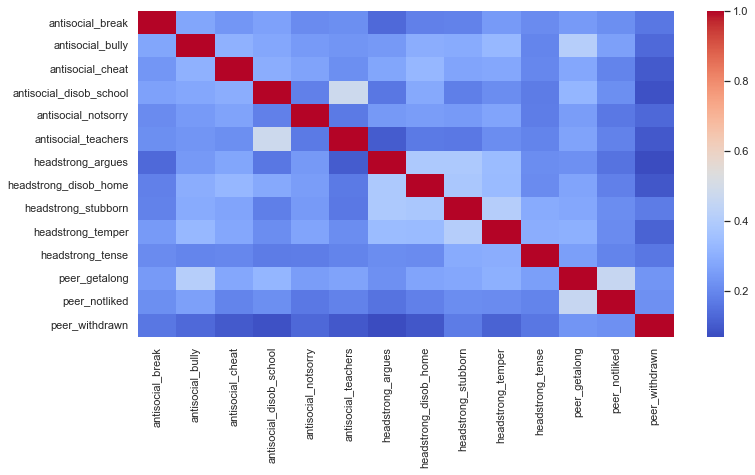

In [29]:
## Make a heatmap
# remember here we are at directory bld! 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style('whitegrid')

plt.figure(figsize=(12,6))
heatmap=sns.heatmap(sub_scale_bpi.filter(regex=r'(headstrong|antisocial|peer)',axis=1).corr(),annot=False,fmt='.2f',cmap='coolwarm')
plt.savefig('heatmap.png')## save heatmap